In [21]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics

In [13]:
PATH=os.getcwd()
mod="CAE"
rep='wvlt'
class_typ='svm'

results_path=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'Results.pkl'
trainRes_path=PATH+"/pdSpanish/classResults/dnn/"+mod+'_'+rep+'TrainResults.pkl'
testRes_path=PATH+"/pdSpanish/classResults/dnn/"+mod+'_'+rep+'TestResults.pkl'

In [58]:
mfda_path=PATH+"/pdSpanish/"
mfdas=pd.read_csv(mfda_path+"metadata-Spanish_All.csv")['M-FDA'].values

In [14]:
results=pd.read_pickle(results_path)

# trainRes=pd.read_pickle(trainRes_path)
# testRes=pd.read_pickle(testRes_path)

In [16]:
for key,item in results.items():
    print(key,np.mean(list(item['tstSpk_data'].values())[0:50]),key,np.mean(list(item['tstSpk_data'].values())[50:]))

pataka 0.26368749999999996 pataka 0.149625
kakaka 0.9039999999999999 kakaka 0.9109999999999999
pakata 0.16325 pakata 0.09449999999999999
papapa 0.18568749999999998 papapa 0.16362500000000002
petaka 0.21187499999999995 petaka 0.220375
tatata 0.1453125 tatata 0.12525000000000003


In [48]:
roc_dic={thrsh*.01:{'tp':0,'fp':0,'tn':0,'fn':0} for thrsh in np.arange(101)}
tprs=[]
fprs=[]
utter='pataka'

for thresh in roc_dic.items():
    thr=thresh[0]
#     for index, col in results.items():
#         if col.name==utter:
#             for epoch in range(n_epochs):
    for key,value in results[utter]['tstSpk_data'].items():
        value=min(value,1)
        if key<50 and value>thr:
            roc_dic[thr]['tp']+=1
        if key<50 and value<thr:
            roc_dic[thr]['fn']+=1
        if key>=50 and value>thr:
            roc_dic[thr]['fp']+=1
        if key>=50 and value<thr:
            roc_dic[thr]['tn']+=1

    tprs.append(roc_dic[thr]['tp']/(roc_dic[thr]['tp']+roc_dic[thr]['fn']+10e-6))
    fprs.append(roc_dic[thr]['fp']/(roc_dic[thr]['fp']+roc_dic[thr]['tn']+10e-6))

(0, 1)

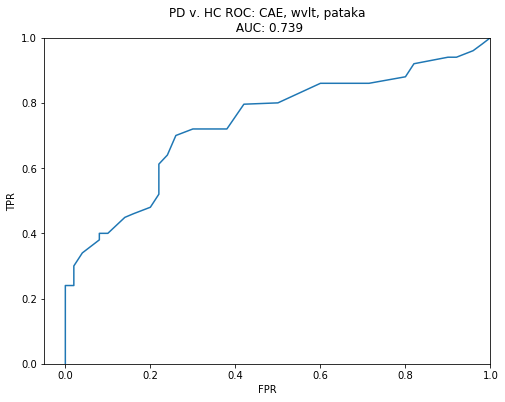

In [49]:
tprs=np.sort(tprs)
fprs=np.sort(fprs)

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(8, 6))
plt.plot(np.sort(fprs),np.sort(tprs))
plt.title("PD v. HC ROC: "+mod+", "+rep+", "+utter+"\n AUC: "+str(np.round(metrics.auc(fprs, tprs),3)))
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_xlim([-.05,1])
ax.set_ylim([0,1])

In [25]:
# for key,item in results.items():
#     print(key,item['test_acc'])

In [41]:
# n_epochs=results.iloc[-1].name[0]
# utters=['pataka','kakaka','pakata','papapa','petaka','tatata']

# col_res={ut:{key:0 for key in results.loc[0].index} for ut in utters}

# for index, col in results.items():
#     col_res[col.name]['tstSpk_data']={num:0 for num in np.arange(100)}
#     col_res[col.name]['test_accPerSpk']=0

#     for epoch in range(n_epochs):
#         col_res[col.name]['train_loss']+=col.loc[epoch]['train_loss']*(1/n_epochs)
#         col_res[col.name]['test_loss']+=col.loc[epoch]['test_loss']*(1/n_epochs)
#         col_res[col.name]['train_acc']+=col.loc[epoch]['train_acc']*(1/n_epochs)
#         col_res[col.name]['test_acc']+=col.loc[epoch]['test_acc']*(1/n_epochs)

#         for key,value in col.loc[epoch]['tstSpk_data'].items():   
# #             if value>=.5:
# #                 col_res[col.name]['test_accPerSpk']+=(1/(100*n_epochs))       
#             col_res[col.name]['tstSpk_data'][key]+=value*(1/n_epochs)
    